<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565890 entries, 0 to 565889
Data columns (total 55 columns):
Elevation                             565890 non-null int64
aspect                                565890 non-null int64
slope                                 565890 non-null int64
horizontal_distance_to_hydrology      565890 non-null int64
vertical_distance_to_hydrology        565890 non-null int64
Horizontal_Distance_To_Roadways       565890 non-null int64
Hillshade_9am                         565890 non-null int64
Hillshade_Noon                        565890 non-null int64
Hillshade_3pm                         565890 non-null int64
Horizontal_Distance_To_Fire_Points    565890 non-null int64
Wilderness_Area_1                     565890 non-null int64
Wilderness_Area_2                     565890 non-null int64
Wilderness_Area_3                     565890 non-null int64
Wilderness_Area_4                     565890 non-null int64
Soil_Type_1                           565890 non-

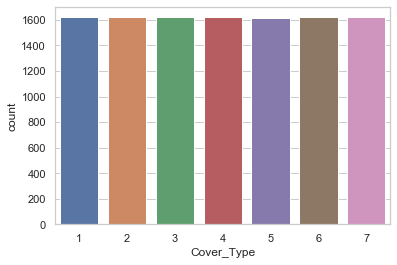

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 60)

# for visualization
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
# to include graphs inline within the frontends next to code
import seaborn as sns
sns.set_context(font_scale=2)
sns.set(style="whitegrid")

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

# machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


dfTrain = pd.read_csv('covtype_data_training.csv')
dfTest = pd.read_csv('covtype_data_testing.csv')

columns= ['Elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways', 
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
       'Soil_Type_1','Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13','Soil_Type_14',
        'Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20','Soil_Type_21','Soil_Type_22','Soil_Type_23',
        'Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30','Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40', 
       'Cover_Type']

dfTrain.columns = columns
dfTest.columns = columns

sns.countplot(data=dfTrain,x=dfTrain['Cover_Type'])
yTest=dfTest['Cover_Type']
y=dfTrain['Cover_Type']
Elevation_Key = [2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400]
dfTest.info()
dfTrain.info()


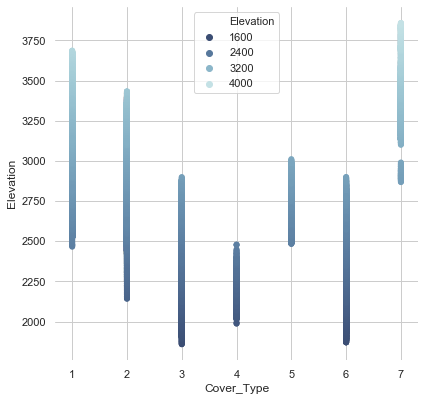

In [31]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Cover_Type", y="Elevation",
               hue="Elevation",
               palette="ch:r=-.2,d=.3_r",
               hue_order=Elevation_Key,
               sizes=(1, 8), linewidth=0,
               data=dfTest, ax=ax)

In [32]:
train = dfTrain.drop('Cover_Type', 1)
test = dfTest.drop('Cover_Type', 1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(test, yTest, test_size=0.98, random_state=72)

In [56]:
rf=RandomForestClassifier(n_estimators=300, class_weight='balanced', n_jobs=2, random_state=72)


In [57]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=2, oob_score=False,
                       random_state=72, verbose=0, warm_start=False)

In [58]:
pred=rf.predict(x_test)

In [59]:
acc=rf.score(x_test, y_test)
report2 = classification_report(y_test, pred)
print(report2)

              precision    recall  f1-score   support

           1       0.83      0.80      0.82    205484
           2       0.82      0.89      0.86    275476
           3       0.77      0.86      0.81     32946
           4       0.64      0.10      0.18       575
           5       0.81      0.21      0.33      7175
           6       0.71      0.36      0.48     14928
           7       0.91      0.65      0.76     17989

    accuracy                           0.82    554573
   macro avg       0.78      0.55      0.60    554573
weighted avg       0.82      0.82      0.82    554573



In [60]:
logisticReg = LogisticRegression(C=1, solver='lbfgs', max_iter=5000, 
                                 random_state=17, n_jobs=4,
                                 multi_class='multinomial')

In [61]:
logisticPipe = Pipeline([('scaler', StandardScaler()), ('logisticReg', logisticReg)])

In [62]:
logisticPipe.fit(x_train, y_train)

logisticValuePrediction = logisticPipe.predict(x_test)

In [63]:
report = classification_report(y_test, logisticValuePrediction)
print(report)

              precision    recall  f1-score   support

           1       0.71      0.70      0.71    205484
           2       0.75      0.81      0.78    275476
           3       0.70      0.83      0.76     32946
           4       0.22      0.10      0.14       575
           5       0.14      0.00      0.00      7175
           6       0.49      0.20      0.29     14928
           7       0.75      0.52      0.61     17989

    accuracy                           0.73    554573
   macro avg       0.54      0.45      0.47    554573
weighted avg       0.72      0.73      0.72    554573

